<h1>Deflate algorithm</h1>

<h3>Introduction</h3>

The Deflate algorithm is a lossless data compression algorithm that is widely used in many applications, including file compression formats such as ZIP, gzip, and PNG. It was developed in the 1990s as a combination of two other compression algorithms, LZ77 and Huffman coding, and uses a combination of these two techniques to achieve high compression ratios. The algorithm works by first identifying repeated patterns in the input data using LZ77, and then encoding these patterns using Huffman coding to create a variable-length code.

In [2]:

from matplotlib import pyplot as plt
import time
import ast
import bisect

Next two cells contain huffman and lz77 algorithms, so deflate can easily work

In [3]:
class Node:
    '''
    Class of node in tree for gaffman algorithm.
    '''
    def __init__(self, poss, left=None, right=None):
        self.poss = poss
        self.left = left
        self.right = right
        self.codelist = ''

class Gaffman:
    '''
    Class that have methods of encoding and decoding.
    '''
    def __init__(self):
        self.text = None
        self.root_node = None
        self.code = None
        self.decoded_text = None


    def read_file(self, filename):
        '''
        Reads file and returns as string.
        '''
        with open(filename, 'r', encoding='utf-8') as old_f:
            content = old_f.read()
        self.text = content

    def build_tree(self, poss):
        '''
        Builds tree for Huffman algorithm.
        '''
        poss = list({Node(val): val  for val in poss}.items())
        while len(poss) > 1:
            add = poss[0][1] + poss[1][1]
            if poss[0][1] > poss[1][1]:
                node = Node(add , poss[0][0], poss[1][0])
            else:
                node = Node(add , poss[1][0], poss[0][0])
            poss = poss[2:]
            bisect.insort(poss, (node, add), key=lambda _x: _x[1])
        self.root_node = poss[0][0]
        return poss[0][0]

    def encode(self, filename2=None):
        '''
        Creates encoded file with name {filename2}.
        '''
        chars = list(set(self.text))
        d_of_possibs = {char: self.text.count(char)/len(self.text) for char in chars}
        possibs = sorted(_p[1] for _p in d_of_possibs.items())
        self.build_tree(possibs)

        def root_code(node: Node):
            '''
            Code tree.
            '''
            if node.left:
                node.left.codelist = node.codelist + '0'
                node.right.codelist = node.codelist + '1'
                root_code(node.left)
                root_code(node.right)

        def read_code(start_node: Node):
            '''
            Returns codes of all lists.
            '''
            if not start_node.left:
                return [(start_node.poss, start_node.codelist)]
            else:
                return read_code(start_node.left) + read_code(start_node.right)

        root_code(self.root_node)
        code_to_proc = read_code(self.root_node)
        self.code = {}
        for char0 in chars:
            for ind, val0 in enumerate(code_to_proc):
                if d_of_possibs[char0] == val0[0]:
                    self.code[char0] = val0[1]
                    code_to_proc.pop(ind)
                    break
        if filename2:
            with open(filename2, 'w', encoding='utf-8') as new_en_f:
                content0 = ''
                for char1 in self.text:
                    content0 += self.code[char1]
                new_en_f.write(content0)

    def decode(self, encoding: dict, huff_tree: Node, filename3):
        '''
        Decode text you encoded.
        Write decoded text into file with name {filename3};
        encoding - dictionary where code is the key and character is the value;
        huff_tree - tree used to code text;
        '''
        encoded_text = self.text
        decoded_text = ''
        current_bits = ''
        current_node = huff_tree
        for char5 in encoded_text:
            if char5 == '0':
                if current_node.left:
                    current_bits += char5
                    current_node = current_node.left
                else:
                    decoded_text += encoding[current_bits]
                    current_bits = char5
                    current_node = huff_tree.left
            else:
                if current_node.right:
                    current_bits += char5
                    current_node = current_node.right
                else:
                    decoded_text += encoding[current_bits]
                    current_bits = char5
                    current_node = huff_tree.right

        with open(filename3, 'w', encoding='utf-8') as new_de_f:
            new_de_f.write(decoded_text)

    def get_reversed_code(self):
        '''
        Return
        '''
        if self.code:
            return dict([(_x3[1], _x3[0]) for _x3 in self.code.items()])


In [4]:
class LZ77:
    """LZ77 algorithm implementation."""

    def __init__(self, buffer_size):
        """Initialize LZ77 algorithm.

        :param window_size: size of window
        :param buffer_size: size of buffer
        """
        self.buffer_size = buffer_size

    def get_data(self, file):

        with open(file, 'r', encoding='utf-8') as f:
            data = f.readlines()
        data = ''.join(data)
        return data


    def lz77_compress(self, file=None, data=None):
        """Compress data using LZ77 algorithm.

        :param data: data to compress
        :return: data data
        >>> lz77 = LZ77(13, 6)
        >>> lz77.lz77_compress('cabracadabrarrarrad')
        [(0, 0, 'c'), (0, 0, 'a'), (0, 0, 'b'), (0, 0, 'r'),\
    (3, 1, 'c'), (2, 1, 'd'), (7, 4, 'r'), (3, 3, 'r'), (3, 1, 'd')]
        """
        data = self.get_data(file) if data is None else data
        compressed_data = []
        search_buffer = ''
        pos = 0
        while pos < len(data):

            if data[pos] not in search_buffer:
                compressed_data.append((0, 0, data[pos]))
                search_buffer += data[pos]
                pos += 1
            else:
                for i in range(self.buffer_size+1):
                    if data[pos:pos+i+1] in search_buffer:
                        element = data[pos:pos+i+1]
                index = search_buffer.rfind(element)
                next_el = data[pos+len(element)] if pos+len(element) < len(data) else ''
                compressed_data.append((len(search_buffer)-index, len(element), next_el))
                search_buffer += element + next_el
                pos += len(element) + 1
            search_buffer = search_buffer[-self.buffer_size:]
        with open('compressed.txt', 'w', encoding='utf-8') as f:
            f.write(str(compressed_data))
        return compressed_data


    def lz77_decompress(self, data, file=None):
        """Decompress data using LZ77 algorithm.

        :param data: data to decompress
        :return: decompressed data
        >>> lz77 = LZ77(13, 6)
        >>> lz77.lz77_decompress([(0, 0, 'c'), (0, 0, 'a'), (0, 0, 'b'), (0, 0, 'r'),\
(3, 1, 'c'), (2, 1, 'd'), (7, 4, 'r'), (3, 3, 'r'), (3, 1, 'd')])
        'cabracadabrarrarrad'
        """
        decompressed_data = ""
        while len(data):
            if data[0][0] == 0 and data[0][1] == 0:
                decompressed_data += data[0][2]
                data.pop(0)
            else:
                index = len(decompressed_data) - int(data[0][0])
                length = int(data[0][1])
                for i in range(length):
                    decompressed_data += decompressed_data[index+i]
                decompressed_data += data[0][2]
                data.pop(0)
        if file:
            with open(file, 'w', encoding='utf-8') as f:
                f.write(decompressed_data)
        return decompressed_data

<h3>Code</h3>

This code is an implementation of the Deflate algorithm, which is a lossless data compression algorithm. The Deflate algorithm combines the LZ77 algorithm for finding repeated sequences of data and the Huffman coding algorithm for encoding those sequences. The code creates an instance of the LZ77 and Huffman classes, and then compresses the input data using LZ77. The compressed data is then passed to the Huffman class, which generates a Huffman tree and encodes the data. The code also includes a deflate_decompress function for decompressing the compressed data using the reverse process of the compression. The input compressed data is first decoded using the Huffman tree, and then the LZ77 algorithm is used to reconstruct the original data.

In [5]:
class Deflate:
    """Deflate algorithm implementation."""

    def __init__(self, buffer_size):
        """Initialize Deflate algorithm.

        :param window_size: size of sliding window
        :param buffer_size: size of look-ahead buffer
        """
        self.lz77 = LZ77(buffer_size)
        self.huffman = Gaffman()
        self.code = None
        self.tree = None


    def deflate_compress(self, input_file, output_file):
        """Compress data using Deflate algorithm.

        :param input_file: name of the input file
        :param output_file: name of the output file
        """
        # Read input data
        input_data = self.lz77.get_data(input_file)

        self.lz77.lz77_compress(data=input_data)
        with open('compressed.txt', 'r', encoding='utf-8') as f:
            data = f.readlines()
        data = ast.literal_eval(''.join(data))
        self.huffman.text = ''
        for i in data:
            self.huffman.text += str(i[0]) + str(i[1]) + i[2]
        if len(self.huffman.text) % 3 != 0:
            self.huffman.text += ' '
        self.huffman.encode(output_file)
        self.code = self.huffman.get_reversed_code()
        self.tree = self.huffman.root_node



    def deflate_decompress(self, input_file, output_file):
        """Decompress data using Deflate algorithm.

        :param input_file: name of the input file
        :param output_file: name of the output file
        """
        with open(input_file, "rb") as f:
            self.huffman.read_file(input_file)
            self.huffman.decode(self.code, self.tree, output_file)

        with open(output_file, 'r', encoding='utf-8') as f:
            input_data = f.readlines()
        input_data = ''.join(input_data)

        lst = []
        items = list(input_data)
        for i in range(0, len(items), 3):
            if i+2 >= len(items):
                next_el = ' '
            else:
                next_el = items[i+2]
            item = (int(items[i]), int(items[i+1]), next_el)
            lst.append(item)

        self.lz77.lz77_decompress(lst, output_file)

In [14]:
d = Deflate(3)

Now we can test speed of encoding and decoding of deflate algoritm.

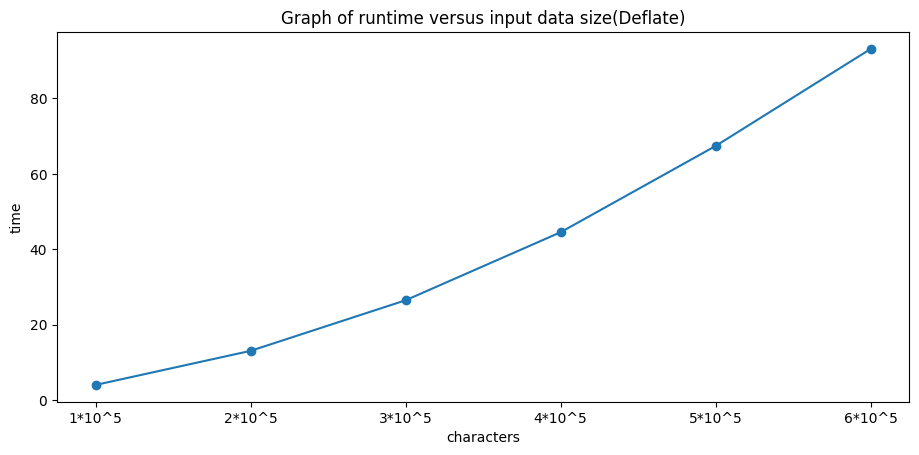

In [10]:
def encode_decode_speed(deflate):
    file_names = ['1', '2', '3', '4', '5', '6']
    result = {}
    for file_name in file_names:
        start = time.time()
        d.deflate_compress(file_name+'deflate.txt', 'output_deflate.txt')
        d.deflate_decompress('output_deflate.txt', file_name+'deflate.txt')
        end = time.time()
        result[f'{file_name}*10^5'] = end - start
        
    plt.figure().set_figwidth(11)
    plt.plot(result.keys(), result.values(), marker = 'o')
    plt.title('Graph of runtime versus input data size(Deflate)')
    plt.xlabel('characters')
    plt.ylabel('time')
    plt.show()

encode_decode_speed(d)

So as you can see that the comprassion rate is very bad.

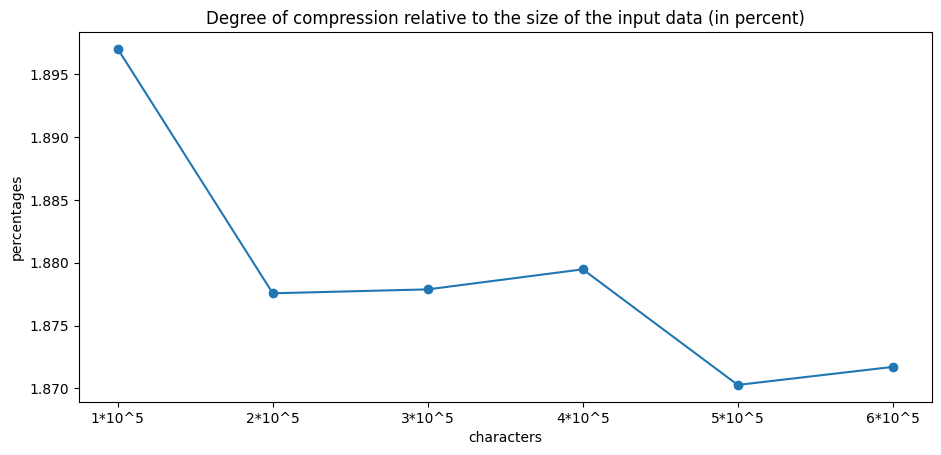

In [17]:
def number_symbols_compress(deflate):
    file_names = ['1', '2', '3', '4', '5', '6']
    result = {}
    for file_name in file_names:
        d.deflate_compress(file_name+'deflate.txt', 'output_deflate.txt')
        with open('output_deflate.txt', 'r', encoding='utf-8') as f:
            input_data = f.readlines()
        input_data = ''.join(input_data)
        result[f'{file_name}*10^5'] = (1 - (len(input_data))/(int(file_name)*100000*8))*100
    plt.figure().set_figwidth(11)
    plt.plot(result.keys(), result.values(), marker = 'o')
    plt.title('Degree of compression relative to the size of the input data (in percent)')
    plt.xlabel('characters')
    plt.ylabel('percentages')
    plt.show()

number_symbols_compress(d)

<h3>Conclusion</h3>

So, the graph of runtime is pretty obvious, the more symbols the longer time algoritm needs to compress and decompress data.
Good to use with small data. In case you're using this deflate algorithm. In terms of speed, Deflate compression can be slower than some other compression algorithms due to the additional step of encoding the LZ77 output with Huffman coding. However, the tradeoff for slower compression is typically higher compression ratios, which can lead to faster transmission and storage times for compressed data.

I didn't manage to create effective algorithm, so the effeciency is bad.

Overall, Deflate is a highly effective compression algorithm that balances speed and compression efficiency to provide a good compression ratio. It is commonly used in popular file formats like ZIP, GZIP, and PNG due to its reliability and compatibility.

In general, Deflate is considered more effective than LZ77 for compressing larger data sets because it includes additional steps such as Huffman coding and run-length encoding, which can improve the compression ratio. However, Deflate may require more computational resources and time than LZ77 due to these additional steps.